<a href="https://colab.research.google.com/github/LTNguyen174/6351071050_Lab3/blob/main/6351071050_LAB3_Bai2(Trang_18_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

câu 1)

In [49]:
data = pd.read_csv('Mall_Customers.csv')

# 2. Thống kê thông tin cơ bản
print("--- Kích thước bộ dữ liệu (Shape) ---")
print(f"Số dòng: {data.shape[0]}, Số cột: {data.shape[1]}")

print("\n--- 5 dòng đầu tiên (Head) ---")
print(data.head())

print("\n--- Thông tin kiểu dữ liệu (Info) ---")
print(data.info())

print("\n--- Thống kê mô tả (Describe) ---")
print(data.describe())

# 3. Kiểm tra và xử lý dữ liệu bị thiếu
print("\n--- Kiểm tra dữ liệu bị thiếu (Missing Values) ---")
missing_values = data.isnull().sum()
print(missing_values)
print("Lý Thanh Nguyên - 6351071050")
if missing_values.sum() == 0:
    print("\nKết luận: Bộ dữ liệu không có giá trị bị thiếu. Không cần xử lý thêm.")
else:
    # (Phần này dự phòng nếu dữ liệu có lỗi)
    # Ví dụ: Điền giá trị trung bình cho các cột số
    data.fillna(data.mean(numeric_only=True), inplace=True)
    print("Đã xử lý các giá trị bị thiếu.")

--- Kích thước bộ dữ liệu (Shape) ---
Số dòng: 200, Số cột: 5

--- 5 dòng đầu tiên (Head) ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Thông tin kiểu dữ liệu (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-10

câu 2)

/tmp/ipython-input-944505812.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipython-input-944505812.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipython-input-944505812.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

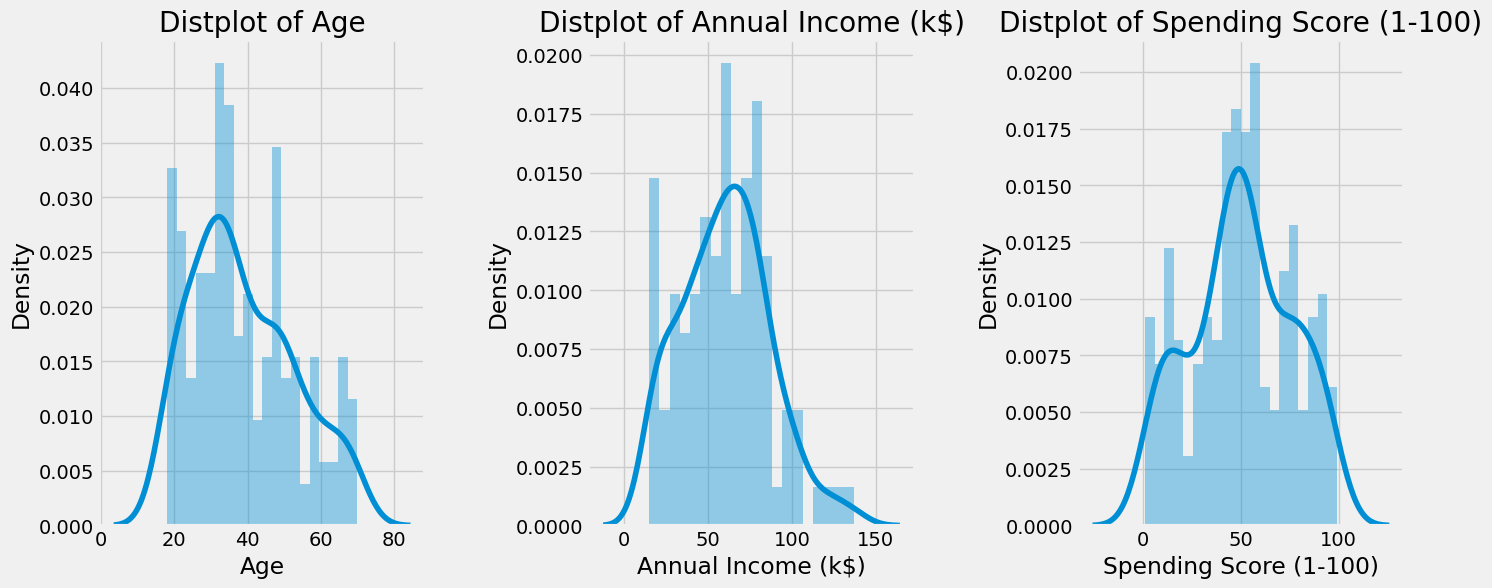

Lý Thanh Nguyên - 6351071050


In [50]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize =(15,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace = 0.5)
    sns.distplot(data[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()
print("Lý Thanh Nguyên - 6351071050")

câu 3)

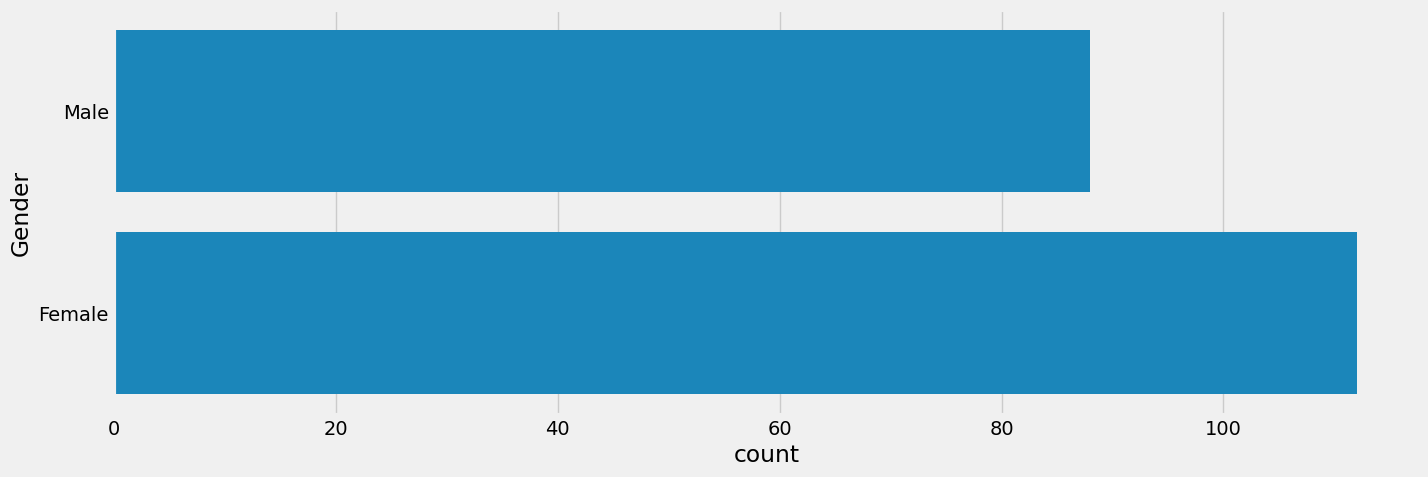

Lý Thanh Nguyên - 6351071050


In [51]:
plt.figure(1, figsize = (15,5))
sns.countplot(y = 'Gender', data = data)
plt.show()
print("Lý Thanh Nguyên - 6351071050")

câu 4)

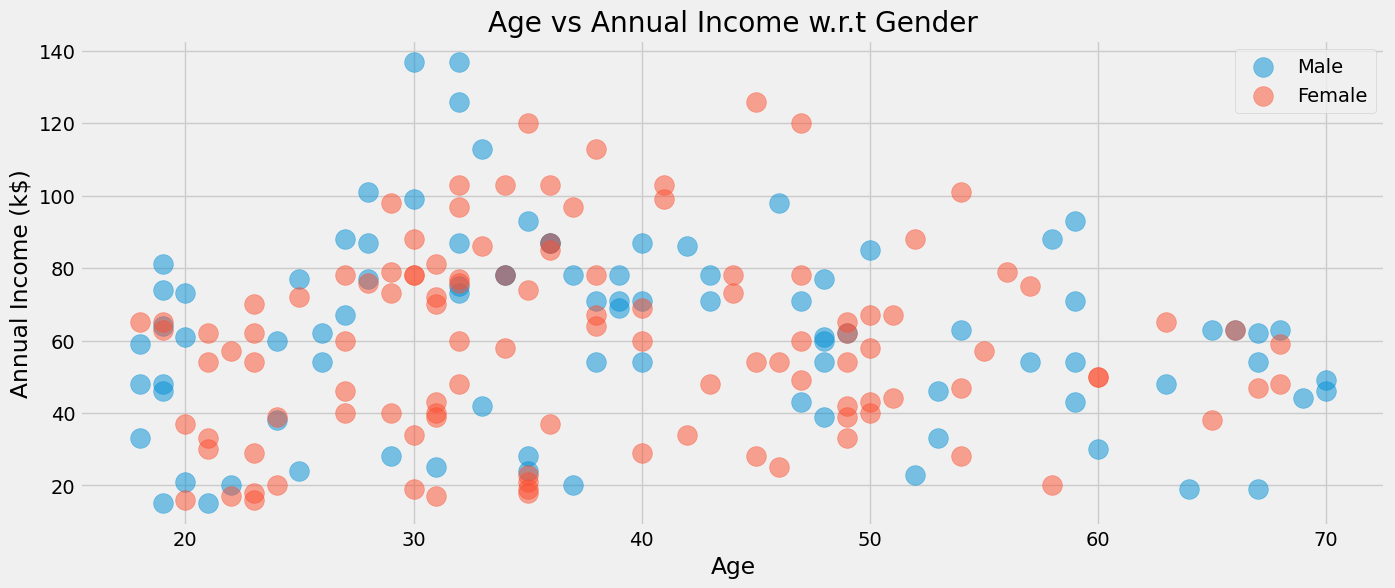

Lý Thanh Nguyên - 6351071050


In [52]:
plt.figure(1, figsize = (15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = data[data['Gender'] == gender],
                s = 200, alpha= 0.5, label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()
print("Lý Thanh Nguyên - 6351071050")

câu 5)

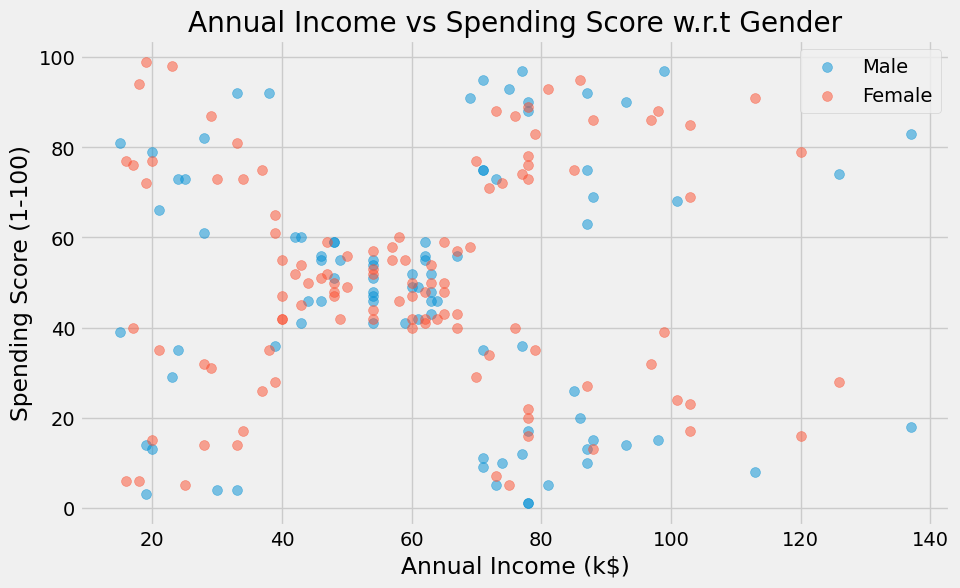

Lý Thanh Nguyên - 6351071050


In [53]:
plt.figure(figsize=(10, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=df[df['Gender'] == gender],
                s=50, alpha=0.5, label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()
print("Lý Thanh Nguyên - 6351071050")

câu 6)

In [54]:
X1 = data[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

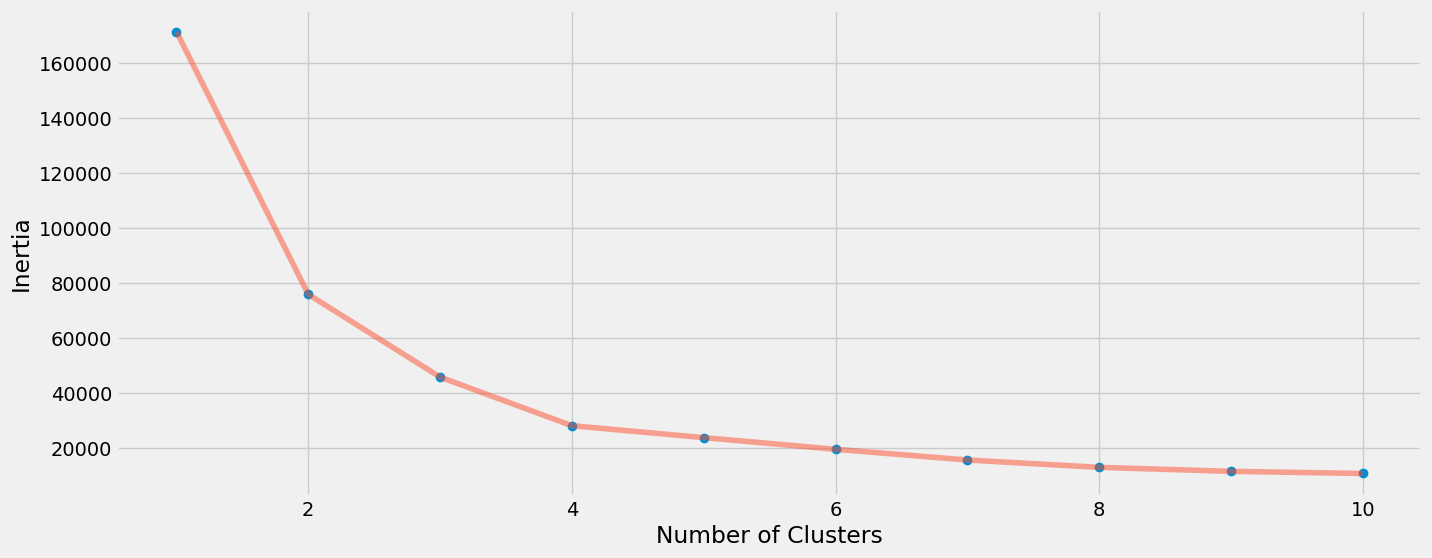

Lý Thanh Nguyên - 6351071050


In [60]:
plt.figure(1, figsize =(15,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()
print("Lý Thanh Nguyên - 6351071050")

In [62]:
algorithm = KMeans(n_clusters= 4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

câu 7)

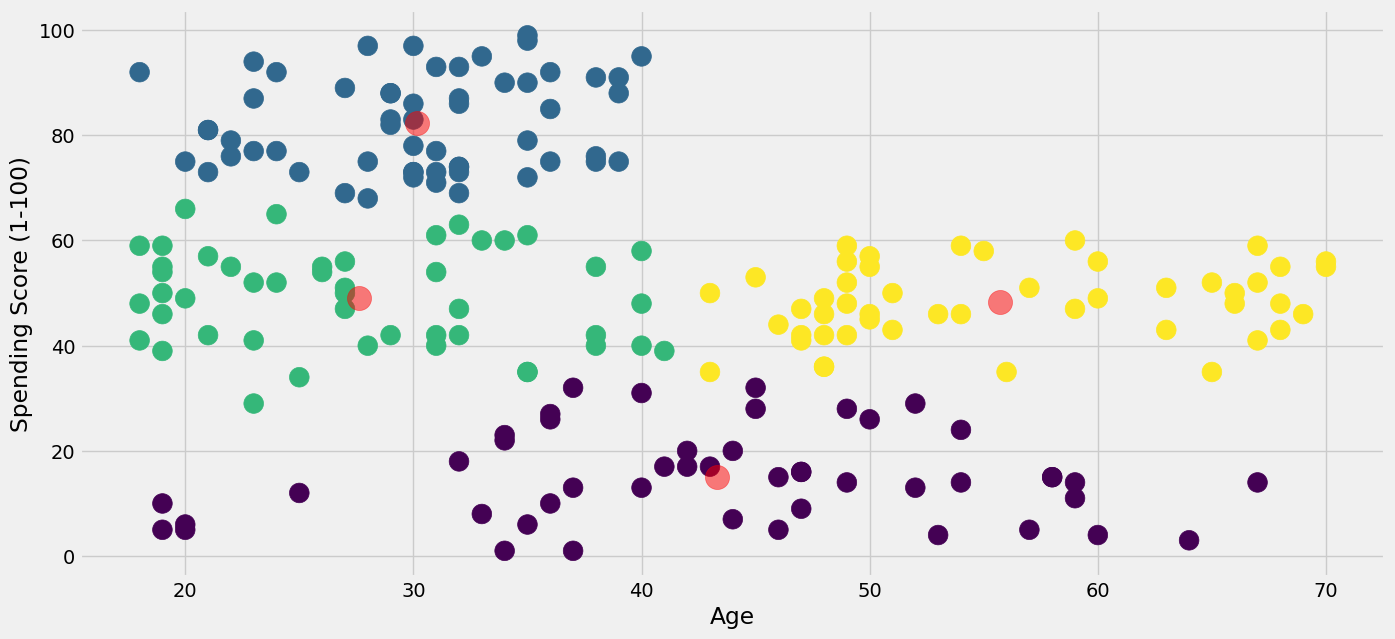

Lý Thanh Nguyên - 6351071050


In [57]:
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x = 'Age', y= 'Spending Score (1-100)', data = data, c = labels1, s = 200)
plt.scatter(x =  centroids1[:, 0], y = centroids1[:, 1], s = 300, c ='red', alpha =0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()
print("Lý Thanh Nguyên - 6351071050")

câu 8)

In [58]:
sil_score = metrics.silhouette_score(X1, labels1, metric='euclidean')
print(f"Silhouette Score (k=4): {sil_score:.4f}")
print("Lý Thanh Nguyên - 6351071050")

Silhouette Score (k=4): 0.4997
Lý Thanh Nguyên - 6351071050


câu 9)

In [59]:
print("Lý Thanh Nguyên - 6351071050")
X3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans3 = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
labels3 = kmeans3.fit_predict(X3)
data['label3'] = labels3
trace1 = go.Scatter3d(
    x = data['Age'],
    y = data['Spending Score (1-100)'],
    z = data['Annual Income (k$)'],
    mode='markers',
      marker= dict(
          color = data['label3'],
          size= 20,
          line=dict(
              color= data['label3'],
              width= 12
          ),
          opacity=0.8
      )
)
dat = [trace1]
layout =  go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis =  dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data=dat, layout=layout)
py.offline.iplot(fig)


Lý Thanh Nguyên - 6351071050
